In [2]:
from calculate import Player
from nba_py import player as players
from nba_py.player import get_player
        
p = Player("Stephen Curry")
pid = get_player("Stephen","Curry")
p.getFloorAverage()

Failed to load community file.
Failed to load community file.
Failed to load community file.


TypeError: string indices must be integers

In [2]:
res = players

In [21]:
players.PlayerPerformanceSplits(pid).overall()

,GROUP_SET,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,Overall,2016-17,39,33,6,0.846,33.7,8.2,17.4,0.468,...,1,1,1,1,1,1,1,1,266,2016-17


In [18]:
players.PlayerPosition

nba_py.constants.PlayerPosition

In [3]:
from pandas.stats.moments import rolling_var
import numpy as np
a = pd.DataFrame(p.seasonStatsWithDKFPS.DKFPS)
b= a.rolling(window=len(df), min_periods=1).mean()[:5]
b.aggregate([np.mean])
# print(a.mean(),a.var(),a.mad(),a.kurt(),a.skew())
#print(a.describe())
#

NameError: name 'pd' is not defined

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(1000, 4),index=pd.date_range('1/1/2000', periods=1000),columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
#df.rolling(window=60).sum().plot(subplots=True)

In [15]:
p.seasonStatsWithDKFPS.DKFPS.var()

77.78449730094466

In [13]:
import glob
import pandas as pd

path = r'data/output/'  # use your path
allFiles = glob.glob(path + "/2*24.csv")
dfTemp = pd.DataFrame()
features = ["Name", "Final", "AvgPointsPerGame", "O/U", "odds","atHome","date","Salary"]

for file_ in allFiles:
    try:
        df1 = pd.read_csv(file_, index_col=None, header=0)
        df1["date"] = file_.split("/")[2].split(".csv")[0]
        df1["date"] = pd.to_datetime(df1["date"],utc=True)
        dfTemp = pd.concat([dfTemp, df1[features]])
    except:
        pass

df = dfTemp[features]
df = df[(df["Final"]>1) & (df["AvgPointsPerGame"]>1) & (df["Salary"] < 7000)]

In [14]:
#,-?[0-9]+\.[0-9]*\n remove last column
ouAndfinal = df[(df["O/U"] > df["O/U"].mean()) & (df["Final"] > df["AvgPointsPerGame"])]["Name"].count() / df.loc[:,"Name"].count()
finalAvg = df[(df["Final"] > df["AvgPointsPerGame"])]["Name"].count() / df.loc[:,"Name"].count()
print("O/U > O/UMean and Final > AvgPoints : " + str(ouAndfinal))
print("Final > AvgPoints: " + str(finalAvg))
print("Sooo... " +  str(ouAndfinal/finalAvg))

O/U > O/UMean and Final > AvgPoints : 0.202898550725
Final > AvgPoints: 0.579710144928
Sooo... 0.35


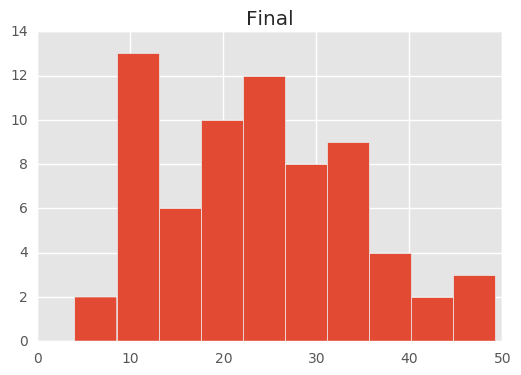

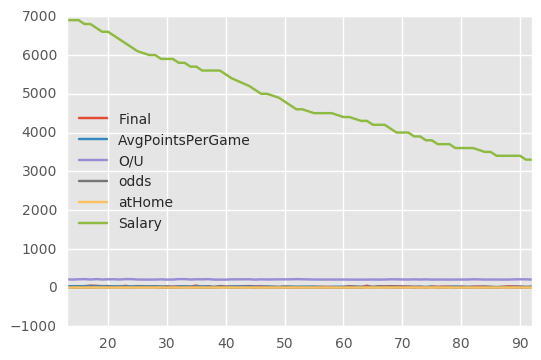

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
df.hist(column="Final")
df.plot();

In [16]:
df.describe()

,Final,AvgPointsPerGame,O/U,odds,atHome,Salary
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,23.851449,22.145319,208.876812,0.152174,0.550725,4917.391304
std,10.830607,6.540670,4.149243,2.864982,0.501065,1139.911829
min,4.000000,7.565000,204.500000,-4.500000,0.000000,3300.000000
25%,14.750000,17.371000,206.000000,-2.500000,0.000000,3900.000000
50%,23.500000,20.944000,206.500000,1.000000,1.000000,4700.000000
75%,31.500000,27.196000,211.000000,2.500000,1.000000,5900.000000
max,49.250000,36.235000,217.000000,4.500000,1.000000,6900.000000


In [17]:
k = df.groupby(["date","O/U"])["Final","AvgPointsPerGame","Salary"]
k.describe()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th></th>
      <th>Final</th>
      <th>AvgPointsPerGame</th>
      <th>Salary</th>
    </tr>
    <tr>
      <th>date</th>
      <th>O/U</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="48" valign="top">2017-01-24</th>
      <th rowspan="8" valign="top">204.5</th>
      <th>count</th>
      <td>13.000000</td>
      <td>13.000000</td>
      <td>13.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>25.961538</td>
      <td>20.083846</td>
      <td>4753.846154</td>
    </tr>
    <tr>
      <th>std</th>
      <td>10.484039</td>
      <td>3.548745</td>
      <td>897.789308</td>
    </tr>
    <tr>
      <th>min</th>
      <td>9.750000</td>
      <td>15.648000</td>
      <td>3400.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>23.250000</td>
      <td>16.778000</td>
      <td>4200.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>24.250000</td>
      <td>19.647000</td>
      <td>4400.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>33.000000</td>
      <td>22.372000</td>
      <td>5600.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>46.000000</td>
      <td>27.196000</td>
      <td>6000.000000</td>
    </tr>
    <tr>
      <th rowspan="8" valign="top">206.0</th>
      <th>count</th>
      <td>13.000000</td>
      <td>13.000000</td>
      <td>13.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>22.134615</td>
      <td>18.473846</td>
      <td>4400.000000</td>
    </tr>
    <tr>
      <th>std</th>
      <td>7.967130</td>
      <td>6.420868</td>
      <td>1154.700538</td>
    </tr>
    <tr>
      <th>min</th>
      <td>9.000000</td>
      <td>7.565000</td>
      <td>3300.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>18.250000</td>
      <td>17.116000</td>
      <td>3500.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>20.250000</td>
      <td>17.988000</td>
      <td>4000.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>28.250000</td>
      <td>19.197000</td>
      <td>4500.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>34.250000</td>
      <td>33.069000</td>
      <td>6900.000000</td>
    </tr>
    <tr>
      <th rowspan="8" valign="top">206.5</th>
      <th>count</th>
      <td>14.000000</td>
      <td>14.000000</td>
      <td>14.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>21.571429</td>
      <td>22.619143</td>
      <td>4835.714286</td>
    </tr>
    <tr>
      <th>std</th>
      <td>11.986141</td>
      <td>7.800200</td>
      <td>1246.291201</td>
    </tr>
    <tr>
      <th>min</th>
      <td>6.500000</td>
      <td>7.728000</td>
      <td>3400.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>12.062500</td>
      <td>17.706250</td>
      <td>3700.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>19.375000</td>
      <td>22.832000</td>
      <td>4450.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>24.062500</td>
      <td>28.410500</td>
      <td>6000.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>49.250000</td>
      <td>33.762000</td>
      <td>6800.000000</td>
    </tr>
    <tr>
      <th rowspan="8" valign="top">211.0</th>
      <th>count</th>
      <td>12.000000</td>
      <td>12.000000</td>
      <td>12.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>18.062500</td>
      <td>22.098500</td>
      <td>4850.000000</td>
    </tr>
    <tr>
      <th>std</th>
      <td>8.607030</td>
      <td>5.943002</td>
      <td>1015.784515</td>
    </tr>
    <tr>
      <th>min</th>
      <td>4.000000</td>
      <td>15.390000</td>
      <td>3300.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>11.437500</td>
      <td>16.060750</td>
      <td>3975.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>15.750000</td>
      <td>21.978500<

In [18]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

/Users/marek5050/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


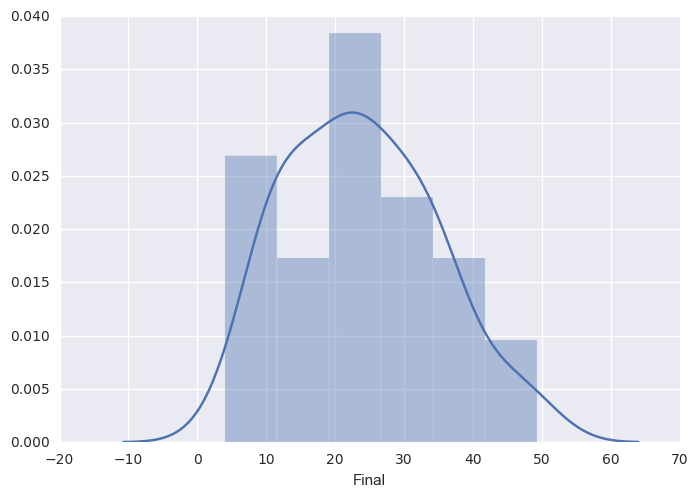

In [19]:
sns.distplot(df["Final"])

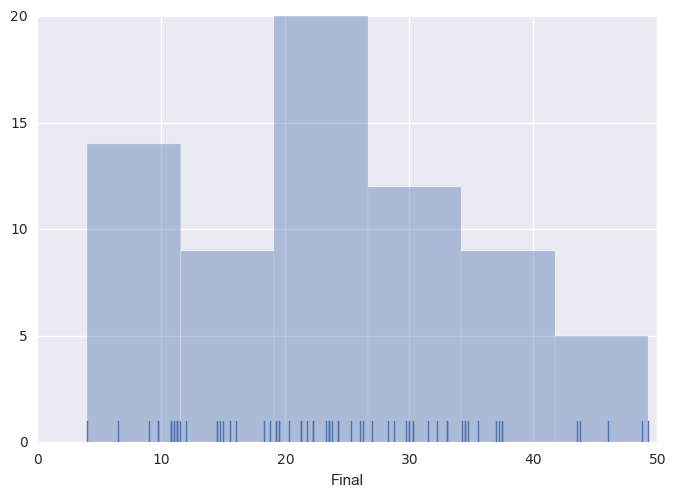

In [20]:
sns.distplot(df["Final"], kde=False, rug=True)

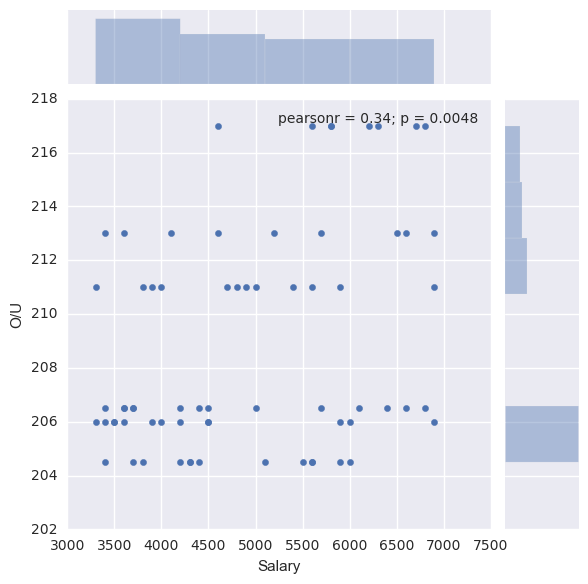

In [21]:
sns.jointplot(x="Salary", y="O/U", data=df);

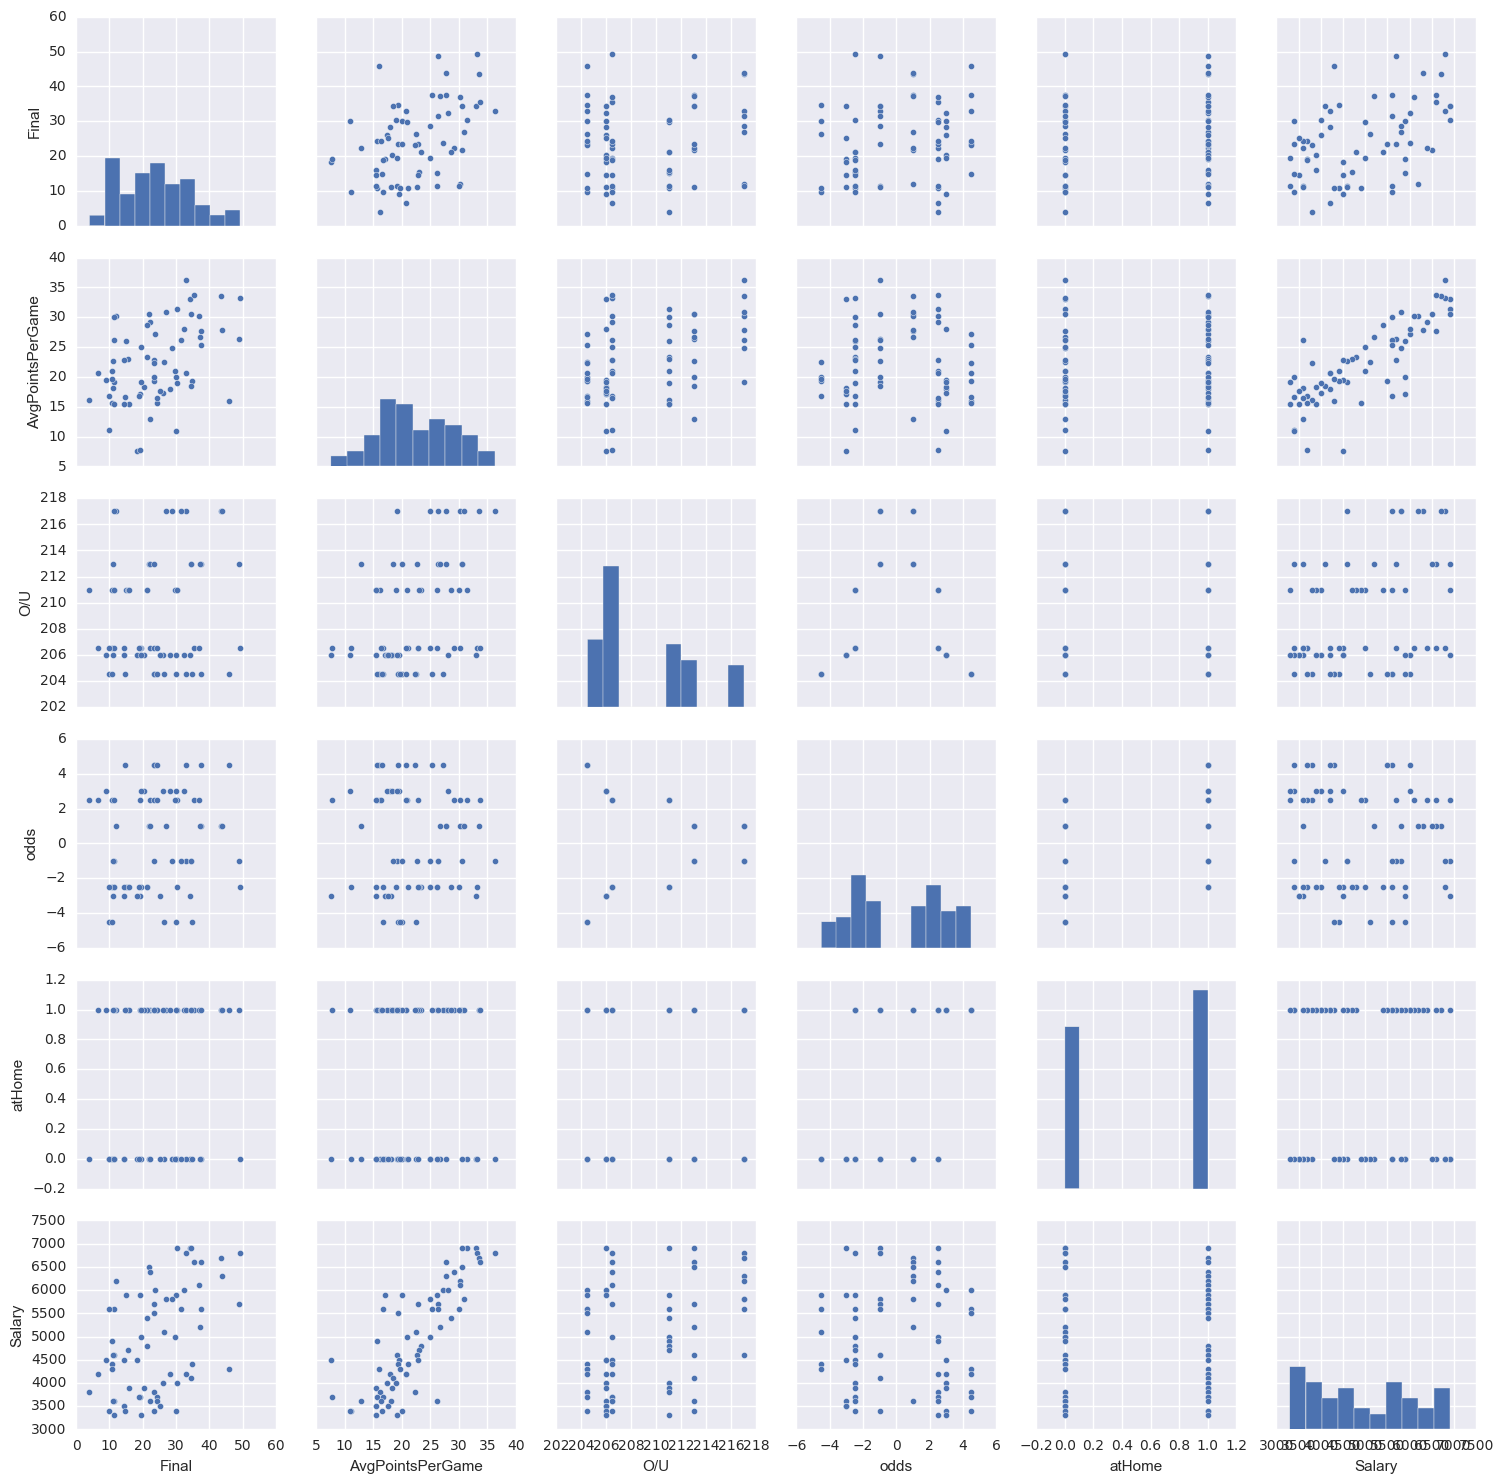

In [22]:
sns.pairplot(df)

In [23]:
import numpy as np
import pandas

# Bin the data frame by "a" with 10 bins...
bins = np.linspace(df["O/U"].min(), df["O/U"].max(), 7)
print(bins)
groups = df.groupby(pandas.cut(df["O/U"], [0,205,212,220,300]))

# Get the mean of b, binned by the values in a
#print(groups[(groups["Final"] > groups["AvgPointsPerGame"])].count())

[ 204.5         206.58333333  208.66666667  210.75        212.83333333
  214.91666667  217.        ]


In [24]:
groups.mean().loc[:,("O/U","Final","AvgPointsPerGame")]

,O/U,Final,AvgPointsPerGame
O/U,,,
"(0, 205]",204.500000,25.961538,20.083846
"(205, 212]",207.717949,20.679487,21.077179
"(212, 220]",214.882353,29.514706,26.172176
"(220, 300]",NaN,NaN,NaN


In [25]:
kkk = groups.mean().loc[:,("O/U","Final","AvgPointsPerGame")]

In [26]:
kkk["Final"]-kkk["AvgPointsPerGame"]

O/U
(0, 205]      5.877692
(205, 212]   -0.397692
(212, 220]    3.342529
(220, 300]         NaN
dtype: float64

In [2]:
import numpy as np
import pandas

# Bin the data frame by "a" with 10 bins...
oddsUni = df
oddsUni["line"]= oddsUni["Final"] - oddsUni["AvgPointsPerGame"]

#oddsUni["odds"] = abs(oddsUni["odds"])
#OUbins = np.linspace(df["O/U"].min(), df["O/U"].max(), 5)
OUbins = [0,213,300]
lineBins = [-99,0,99]
bins = np.linspace(oddsUni["odds"].min(), oddsUni["odds"].max(), 5)
print(bins)
groupsOdds = df.groupby([pandas.cut(oddsUni["O/U"],OUbins),pandas.cut(oddsUni["odds"], bins), pandas.cut(oddsUni["line"],lineBins)])

# Get the mean of b, binned by the values in a
#print(groups[(groups["Final"] > groups["AvgPointsPerGame"])].count())

[-16.  -8.   0.   8.  16.]


In [3]:
kk3 = groupsOdds.count().loc[:,("line")]

In [4]:
kk3

O/U         odds       line    
(0, 213]    (-16, -8]  (-99, 0]     59
                       (0, 99]      54
            (-8, 0]    (-99, 0]    192
                       (0, 99]     215
            (0, 8]     (-99, 0]    219
                       (0, 99]     217
            (8, 16]    (-99, 0]     52
                       (0, 99]      53
(213, 300]  (-16, -8]  (-99, 0]     75
                       (0, 99]     105
            (-8, 0]    (-99, 0]    119
                       (0, 99]     121
            (0, 8]     (-99, 0]    149
                       (0, 99]     143
            (8, 16]    (-99, 0]     76
                       (0, 99]     109
Name: line, dtype: int64

In [ ]:
sns.kdeplot(kk3, shade=True, cut=0)
sns.rugplot(kk3);